# Highlighting the Limits of Federated Learning in Intrusion Detection

This notebook serves to generate the graphs for the demonstration paper "Highlighting the Limits of Federated Learning in Intrusion Detection" submitted to ICDCS 2024.

Settings for the IEEE template:
- `\textwidth`: 7.1413in
- `\linewidth`: 3.21082in
- `\columnwidth`: 3.48761in

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import json
from functools import reduce

import matplotlib
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_pgf import FigureCanvasPgf

# Make the interactive backend as PDF
matplotlib.backend_bases.register_backend("pdf", FigureCanvasPgf)

# plt.style.use("ieee.mplstyle")
plt.style.use("cdb.mplstyle") # version used in the manuscript
TEXTWIDTH = 6.30045  # in inches
PAGEWIDTH = 6.30045 + 1.17638 + 0.1384  # in inches


def figsize(x, y, two_column=False):
    """Make a figure size with respect to a given width.

    Example:
    --------
    >>> mk_figsize(1, 1)
    (3.3374, 3.3374)
    >>> mk_figsize(1, 2)
    (3.3374, 6.6748)
    >>> mk_figsize(1, 1/3, two_column=True)
    (7.00697, 2.2258)
    """
    columnwidth = 3.48761
    textwidth = 7.1413

    w = textwidth if two_column else columnwidth
    return w * x, w * y


def newfig(
    format: float = 1.618 / 1,  # Golden ratio, can be 4/3, 16/9, etc.
    width: float = 1,  # % of \textwidth
    height: float | None = None,
    base_width: float = TEXTWIDTH,  # in inches
    base_height: float = TEXTWIDTH / 1.618,
    **kwargs,
) -> Figure:
    """Create a new figure with the appropriate size."""
    figwidth = base_width * width

    if height is not None:
        figheight = base_height * height
    else:
        figheight = figwidth / format

    # set constrained_layout to True by default
    kwargs["layout"] = kwargs.get("layout", "constrained")

    return plt.figure(figsize=(figwidth, figheight), **kwargs)


SAVEDIR = (
    "/Users/leo/Workspace/phdcybersec/thesis/src/chapters/04_application/figures/"
)

def avg_metric(
    path: str, metric: str = "f1", client_filter: str = "benign"
) -> pd.Series:
    """Compute the average metric for a scenario over time."""
    results = json.load(open(path))
    avg: list[pd.DataFrame] = []
    for client, data in results.items():
        if client_filter not in client:
            continue
        del data["10"]["attack_stats"]
        client_df = pd.DataFrame(data).T
        avg.append(client_df)
    df = reduce(lambda x, y: x + y, avg) / len(avg)
    return df[metric]


# SAVEDIR = "/Users/leo/Workspace/imta/demo-paper/src/figures/"

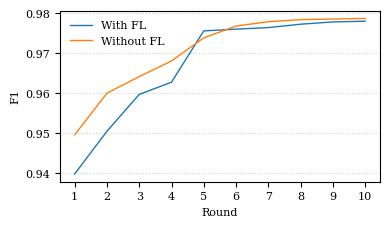

In [19]:
# fig = plt.figure(figsize=figsize(1, 0.5))
fig = newfig(width=.6, format=7/4)
ax = fig.add_subplot(111)

ax.plot(avg_metric("results/setup=iid,strategy=fedavg/metrics.json"), label="With FL")
ax.plot(
    avg_metric("results/setup=iid,strategy=fednoagg/metrics.json"), label="Without FL"
)

ax.set_xlabel("Round")
ax.set_ylabel("F1")

ax.legend()
ax.grid(axis="y", linestyle=":", alpha=0.6)

fig.savefig(f"{SAVEDIR}/iid.pdf", bbox_inches="tight")

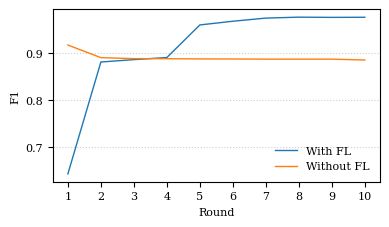

In [20]:
fig = newfig(width=.6, format=7/4)
ax = fig.add_subplot(111)

ax.plot(avg_metric("results/setup=niid,strategy=fedavg/metrics.json"), label="With FL")
ax.plot(
    avg_metric("results/setup=niid,strategy=fednoagg/metrics.json"), label="Without FL"
)

ax.set_xlabel("Round")
ax.set_ylabel("F1")

ax.legend()
ax.grid(axis="y", linestyle=":", alpha=0.6)


fig.savefig(f"{SAVEDIR}/niid.pdf", bbox_inches="tight")

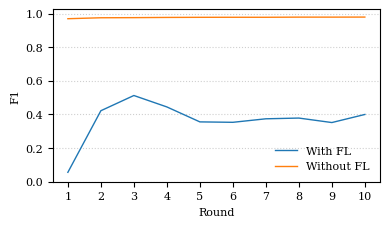

In [21]:
fig = newfig(width=.6, format=7/4)
ax = fig.add_subplot(111)

ax.plot(
    avg_metric("results/setup=heterogeneous,strategy=fedavg/metrics.json"),
    label="With FL",
)
ax.plot(
    avg_metric("results/setup=heterogeneous,strategy=fednoagg/metrics.json"),
    label="Without FL",
)

ax.set_xlabel("Round")
ax.set_ylabel("F1")

ax.legend()
ax.grid(axis="y", linestyle=":", alpha=0.6)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])


fig.savefig(f"{SAVEDIR}/heterogeneous.pdf", bbox_inches="tight")

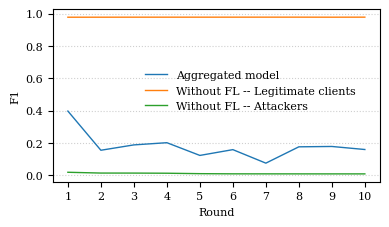

In [22]:
fig = newfig(width=.6, format=7/4)
ax = fig.add_subplot(111)

ax.plot(
    avg_metric("results/setup=poisoning,strategy=fedavg/metrics.json"),
    label="Aggregated model",
)
ax.plot(
    avg_metric("results/setup=poisoning,strategy=fednoagg/metrics.json"),
    label="Without FL -- Legitimate clients",
)
ax.plot(
    avg_metric(
        "results/setup=poisoning,strategy=fednoagg/metrics.json",
        client_filter="malicious",
    ),
    label="Without FL -- Attackers",
)


ax.set_xlabel("Round")
ax.set_ylabel("F1")

ax.legend(bbox_to_anchor=(0.25, 0.35))
ax.grid(axis="y", linestyle=":", alpha=0.6)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])


fig.savefig(f"{SAVEDIR}/poisoning.pdf", bbox_inches="tight")